In [14]:
import matplotlib.pyplot as plt
import numpy as np
import qutip

from qutip import *

In [15]:
# number of levels calculated
n = 10

# definition of the frequency modulation (and its time derivative)
def w(t, w0, dwQ, dtQ, dwP, dtP, delay):
    freq = w0
    freq += dwQ/(np.sqrt(2*np.pi)*dtQ)*np.exp(-0.5*(t/dtQ)**2)
    freq += dwP*np.sin(2*w0*(t-delay))*np.heaviside(t-delay,1)*np.heaviside(dtP-(t-delay),1)
    return(freq)

def wdot(t, w0, dwQ, dtQ, dwP, dtP, delay):
    freqD = - dwQ/(np.sqrt(2*np.pi)*dtQ)*np.exp(-0.5*(t/dtQ)**2) * t/(dtQ**2)
    freqD += 2*w0*dwP*np.cos(2*w0*t)*np.heaviside(t-delay,1)*np.heaviside(dtP-(t-delay),1)
    return(freqD)

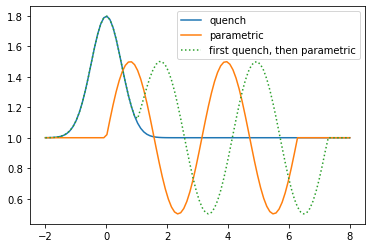

In [16]:
# plot different frequency modulations
tlist = np.linspace(-2,8,100)
wQuench = w(tlist, w0=1, dwQ=1, dtQ=0.5, dwP=0, dtP=0, delay=0)
wQuenchD = wdot(tlist, w0=1, dwQ=1, dtQ=0.5, dwP=0, dtP=0, delay=0)
wParam = w(tlist, w0=1, dwQ=0, dtQ=0.1, dwP=0.5, dtP=4*np.pi/2, delay=0)
wBoth = w(tlist, w0=1, dwQ=1, dtQ=0.5, dwP=0.5, dtP=4*np.pi/2, delay=1)

plt.plot(tlist, wQuench, label="quench")
# plt.plot(tlist, wQuenchD, label="quench diff")
plt.plot(tlist, wParam, label="parametric")
plt.plot(tlist, wBoth,":", label="first quench, then parametric")
plt.legend()

In [18]:
# defining the initial state and the hamiltonian
psi0 = fock(n,0)

def H(t, args):
    w0 = args['w0']
    dwQ = args['dwQ']
    dtQ = args['dtQ']
    dwP = args['dwP']
    dtP = args['dtP']
    delay = args['delay']
    n = args['n']
    ad = create(n)
    a = destroy(n)
    ham = w(t, w0, dwQ, dtQ, dwP, dtP, delay)*(ad*a+0.5*qeye(n))
    ham += 1j/4*wdot(t, w0, dwQ, dtQ, dwP, dtP, delay)/w(t, w0, dwQ, dtQ, dwP, dtP, delay)*(a*a-ad*ad)
    return(ham)

In [24]:
argsQ = {'w0': 1,
       'dwQ': 1,
       'dtQ': 0.5,
       'dwP': 0,
       'dtP': 0,
       'delay': 0,
       'n': n}

argsP = {'w0': 1,
       'dwQ': 0,
       'dtQ': 0.1,
       'dwP': 0.5,
       'dtP': 4*np.pi/2,
       'delay': 0,
       'n': n}

argsQP = {'w0': 1,
       'dwQ': 1,
       'dtQ': 0.5,
       'dwP': 0.5,
       'dtP': 4*np.pi/2,
       'delay': 1,
       'n': n}

In [ ]:
timesQ = np.linspace(-3,3,100)
resultQ = mesolve(H, psi0, timesQ, args=argsQ)

timesP = np.linspace(-1,7,100)
resultP = mesolve(H, psi0, timesP, args=argsP)

timesQP = np.linspace(-2,8,200)
resultQP = mesolve(H, psi0, timesQP, args=argsQP)

In [ ]:
psi = resultP.states[-1]

# print the occupation of the different fock states
# and yes, it is a squeezed state!!!

psiP = abs(psi.dag().full())[0]
plt.bar(np.arange(0,n),psiP)
plt.show()

In [ ]:
# here comes the phase space plot
# dimensionless position and momentum operators
ad = create(n)
a = destroy(n)
x = 1/np.sqrt(2)*()